In [1]:
#Cossio Vidaurre José Alejandro

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Lectura del Dataset
dataset = pd.read_csv('Dummy_Data_HSS.csv')
dataset.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [4]:
#Informacion del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
#Contando los datos nulos
dataset.isnull().sum(axis = 0)

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [6]:
#Al ver que hay datos nulos y no son muchos, una opcion es eliminarlos
dataset.dropna(inplace = True)

In [7]:
#Comprobando los datos nulos
dataset.isnull().sum(axis = 0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [8]:
#Creacion de variables
X = dataset.iloc[:, :-1].values #Todas las filas y todas las columnas menos la ultima
y = dataset.iloc[:, -1].values #Solo la ultima columna

In [9]:
# Codificacion de datos categoricos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[0.0 1.0 0.0 ... 16.0 6.566230788 2.907982773]
 [0.0 1.0 0.0 ... 13.0 9.237764567 2.409567204]
 [0.0 1.0 0.0 ... 41.0 15.88644602 2.913410175]
 ...
 [0.0 0.0 1.0 ... 44.0 19.80007236 5.096191875]
 [1.0 0.0 0.0 ... 71.0 17.5346403 1.94087322]
 [0.0 0.0 1.0 ... 42.0 15.96668752 5.046547629]]


In [11]:
#Segmentacion de los datos
from sklearn.model_selection import train_test_split
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
#Entrenamiento
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_mult, y_train_mult)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test_mult)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_mult.reshape(len(y_test_mult),1)),1))

[[277.74 277.24]
 [234.89 236.16]
 [167.26 167.72]
 ...
 [135.19 140.14]
 [152.94 153.54]
 [ 53.25  57.13]]


In [14]:
#Visualizacion de los resultados del conjunto de entrenamiento
import statsmodels.regression.linear_model as lm
X = np.append(arr = np.ones((4546, 1)).astype("int64"), values = X, axis = 1)
SL = 0.05

In [15]:
X_opt = X[:, [0, 1, 2, 3, 4]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8016
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.493
Time:                        00:32:33   Log-Likelihood:                -27055.
No. Observations:                4546   AIC:                         5.412e+04
Df Residuals:                    4542   BIC:                         5.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.9533      1.104    139.466      0.000     151.789     156.117
x1            42.1129      2.426     17.355      0.000      37.356      46.870
x2            36.4597      2.393     15.237      0.000      31.768      41.151
x3            37.6251      2.396     15.702      0.000      32.928      42.323
x4            37.7556      2.408     15.681      0.000      33.035      42.476
==============================================================================
Omnibus:                     3319.142   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.596
Skew:                           0.070   Prob(JB):                     4.73e-59
Kurtosis:                       1.818   Cond. No.                     2.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
X_opt = X[:, [0, 1, 3, 4]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8016
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.493
Time:                        00:32:34   Log-Likelihood:                -27055.
No. Observations:                4546   AIC:                         5.412e+04
Df Residuals:                    4542   BIC:                         5.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.4129      2.741     69.473      0.000     185.040     195.786
x1             5.6532      3.911      1.446      0.148      -2.014      13.320
x2             1.1655      3.879      0.300      0.764      -6.440       8.771
x3             1.2959      3.891      0.333      0.739      -6.333       8.925
==============================================================================
Omnibus:                     3319.142   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.596
Skew:                           0.070   Prob(JB):                     4.73e-59
Kurtosis:                       1.818   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_opt = X[:, [0, 1]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.271
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.132
Time:                        00:32:34   Log-Likelihood:                -27055.
No. Observations:                4546   AIC:                         5.411e+04
Df Residuals:                    4544   BIC:                         5.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.2305      1.587    120.488      0.000     188.119     194.342
x1             4.8357      3.209      1.507      0.132      -1.456      11.127
==============================================================================
Omnibus:                     3323.421   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.685
Skew:                           0.071   Prob(JB):                     4.53e-59
Kurtosis:                       1.817   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X = dataset.iloc[:, [0]].values
y = dataset.iloc[:, -1].values

In [19]:
print(X)

[[16.]
 [13.]
 [41.]
 ...
 [44.]
 [71.]
 [42.]]


In [20]:
print(y)

[ 54.73  46.68 150.18 ... 163.63 253.61 148.2 ]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

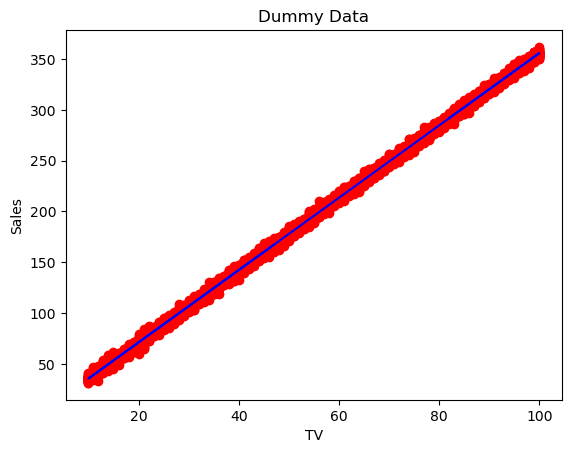

In [23]:
#Visualizacion data Training
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Dummy Data')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

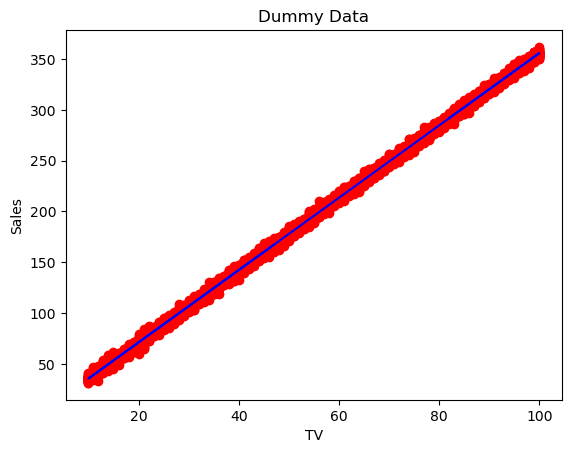

In [24]:
#Visualizacion data Testing
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Dummy Data')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()